In [1]:
include("../output.jl")
using ImpvolOutput, CSV, JLD2, FileIO, Plots
gr()
default(fmt = :png)
parameters = load("../experiments/baseline/common_parameters.jld2")["parameters"]


LoadError: [91mUndefVarError: scenario not defined[39m

In [2]:
results = load("../experiments/baseline/actual/results.jld2")["results"]

36-element Array{Tuple{Int64,Dict{Symbol,Any}},1}:
 (1, Dict{Symbol,Any}(Pair{Symbol,Any}(:R_njs, [13549.2 3845.44 … 26437.1 2.40511e5]

[10954.2 2394.86 … 16225.1 1.42561e5]

[495.393 179.038 … 1424.87 10646.2]

...

[792.422 16.7605 … 3747.47 26312.2]

[971.438 475.858 … 3816.94 23359.4]

[52254.5 19669.7 … 1.59195e5 1.17013e6]),Pair{Symbol,Any}(:d_njs_free, [0.0287092 0.00488742 … 0.0238401 0.260858]

[0.0411535 0.00753755 … 0.0342901 0.179461]

[0.0147391 0.0103941 … 0.0580459 0.282041]

...

[0.0147958 4.76184e-5 … 0.0577431 0.34028]

[0.0140748 0.00785107 … 0.0520253 0.213611]

[0.0273303 0.0222773 … 0.0536054 0.104932]),Pair{Symbol,Any}(:real_GDP, [7238.72 2720.99 … 14777.3 1.01478e5]

[3285.4 950.788 … 5094.84 33853.3]

[246.116 117.689 … 739.919 4171.96]

...

[340.623 9.52775 … 1685.45 8951.73]

[424.623 275.111 … 1745.52 8075.87]

[40163.5 19975.8 … 1.28106e5 7.13066e5]),Pair{Symbol,Any}(:d_mnjs, [0.989808 5.92529e-7 … 0.000343181 0.000935468; 9.84511e-5 0.93656 … 0.00023030

In [8]:
L_njt = ImpvolOutput.make_series(results, :L_njs)
w_njt = ImpvolOutput.make_series(results, :w_njs)

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 50372.4  19092.7  33133.6  91014.8  …  37965.2  1.54871e5  1.13397e6

[:, :, 2, 1] =
 50224.7  19114.1  33040.0  90864.1  …  37921.5  1.54555e5  1.12975e6

[:, :, 3, 1] =
 50853.9  19251.1  33144.4  91161.3  …  37734.0  1.54984e5  1.12316e6

...

[:, :, 22, 1] =
 50447.9  18745.5  31812.9  90448.2  …  37446.4  1.53926e5  1.13581e6

[:, :, 23, 1] =
 50585.5  19009.4  33331.7  91053.3  …  37849.7  1.53904e5  1.13122e6

[:, :, 24, 1] =
 50662.8  19140.5  33305.4  91133.0  …  38013.1  1.55215e5  1.13257e6

[:, :, 1, 2] =
 62668.0  21899.5  38802.8  99281.5  …  41068.3  1.56691e5  1.23449e6

[:, :, 2, 2] =
 62995.6  21559.9  37084.0  1.02271e5  …  42590.1  1.58274e5  1.20471e6

[:, :, 3, 2] =
 64268.1  21754.2  37552.5  1.00626e5  …  42734.9  156668.0  1.19438e6

...

[:, :, 22, 2] =
 61845.6  16774.1  36725.3  92461.5  …  37315.2  1.5164e5  1.18415e6

[:, :, 23, 2] =
 67367.4  19975.5  41461.1  99504.9  …  43486.8  160489.0  1.1813e6

[:, :, 24,

In [9]:
labor_share = L_njt ./ sum(L_njt, 3)
wage_share = (w_njt .* L_njt) ./ sum(w_njt .* L_njt, 3)

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.113399  0.0854336  0.0784755  0.110134  …  0.0779483  0.0721719  0.0895915

[:, :, 2, 1] =
 0.051468  0.0298528  0.0321478  0.03262  …  0.0257445  0.024883  0.029888

[:, :, 3, 1] =
 0.00385557  0.00369521  0.00266766  …  0.00312672  0.00361373  0.00368329

...

[:, :, 22, 1] =
 0.00533608  0.000299152  0.00175329  …  0.00542344  0.00823165  0.00790319

[:, :, 23, 1] =
 0.006652  0.00863792  0.0126972  …  0.00613516  0.00852504  0.00712992

[:, :, 24, 1] =
 0.629188  0.6272  0.629686  0.629089  …  0.626589  0.625666  0.629543

[:, :, 1, 2] =
 0.109156  0.0825296  0.0762287  0.109864  …  0.0733016  0.0698829  0.090841

[:, :, 2, 2] =
 0.052571  0.0282879  0.0289476  …  0.0246785  0.0244409  0.0292405

[:, :, 3, 2] =
 0.00371326  0.00362722  0.00253284  …  0.00310602  0.00341069  0.00351354

...

[:, :, 22, 2] =
 0.00569776  0.000307191  0.00174364  …  0.00622731  0.00901434  0.00870499

[:, :, 23, 2] =
 0.00679044  0.00828397  0.0155315  … 

In [11]:
include("../calibration_utils.jl")
_, wage_share_trend = DetrendUtilities.detrend(wage_share, parameters[:bp_weights])

([1.13624e-16 8.76035e-17 … 7.80626e-17 8.58688e-17]

[4.90059e-17 3.05745e-17 … 2.38524e-17 2.79724e-17]

[3.36103e-18 3.17129e-18 … 3.82181e-18 3.49655e-18]

...

[5.25838e-18 3.15096e-19 … 8.34836e-18 8.23994e-18]

[6.61363e-18 8.29415e-18 … 8.72783e-18 6.50521e-18]

[6.245e-16 6.10623e-16 … 6.10623e-16 6.03684e-16]

[-0.00447164 -0.000371983 … -0.000817926 0.00255578]

[0.00297593 -0.000548208 … -0.000172925 0.000108021]

[3.05515e-6 6.97723e-5 … -6.62189e-5 -2.11135e-5]

...

[-0.000240956 -1.36902e-5 … 2.97809e-5 3.08179e-5]

[0.000257403 -9.57155e-5 … 0.000210195 -0.000204907]

[0.000626089 -0.000232595 … -0.000268177 -0.000851517]

[0.00439568 -0.000979145 … -0.000291521 0.00129603]

[0.000201164 -0.000873376 … -0.000468211 -0.000322994]

[-5.70081e-6 -4.01976e-5 … -2.26618e-5 -3.77063e-5]

...

[0.000321712 4.63237e-5 … 0.000542876 0.000190636]

[-5.65822e-5 -6.46177e-5 … 0.000310685 -9.21593e-5]

[0.000313487 0.000325738 … -0.000104009 -0.000576874]

...

[0.00407014 0.001219

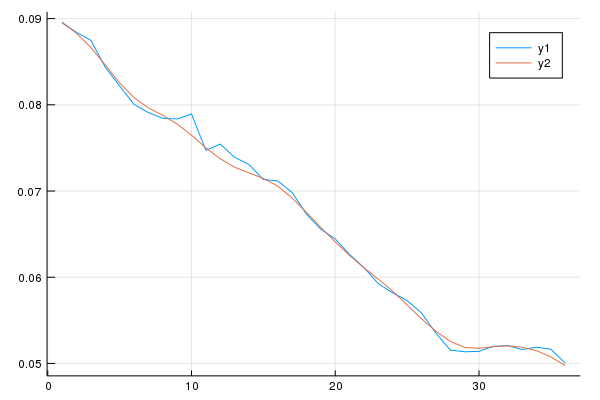

In [14]:
plot([labor_share[1,25,1,:] wage_share_trend[1,25,1,:]])

In [19]:
cov(labor_share[:], wage_share_trend[:]) / sqrt(var(labor_share[:]) * var(wage_share_trend[:]))

0.9998091653455684

In [20]:
cor(labor_share[:], wage_share_trend[:])

0.9998091653455682

In [29]:
w_labor_share = labor_share .- mean(labor_share, 4)
w_wage_share = wage_share_trend .- mean(wage_share_trend, 4)

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.0160004  0.0267702  0.0164262  …  0.0267679  0.0120719  0.0229553

[:, :, 2, 1] =
 0.0097656  0.00720086  0.00264735  …  0.00744491  0.00324044  0.0072357

[:, :, 3, 1] =
 0.000359293  0.000736085  2.0896e-5  …  0.000249978  0.000424058

...

[:, :, 22, 1] =
 0.000575996  -0.00243768  5.43891e-5  …  0.000640511  -0.000537176

[:, :, 23, 1] =
 -0.000599909  0.000785204  …  0.000695604  -1.6274e-5  3.34076e-5

[:, :, 24, 1] =
 -0.0533108  -0.0515047  -0.0547826  …  -0.0533571  -0.054392  -0.0523795

[:, :, 1, 2] =
 0.0162283  0.0242382  0.0136078  …  0.0236457  0.0106008  0.021649

[:, :, 2, 2] =
 0.00789266  0.00618411  0.000932985  …  0.00627762  0.00297127  0.0064802

[:, :, 3, 2] =
 0.00021393  0.000598327  -1.21988e-5  …  0.000113151  0.00027542

...

[:, :, 22, 2] =
 0.00117863  -0.00241596  0.00022728  …  0.0012787  0.00139342  0.000233805

[:, :, 23, 2] =
 -0.000718872  0.000526962  0.00628747  …  7.19283e-6  -0.000264506

[:, :, 24,

In [31]:
cor(w_labor_share[:], w_wage_share[:])

0.9353287483689668

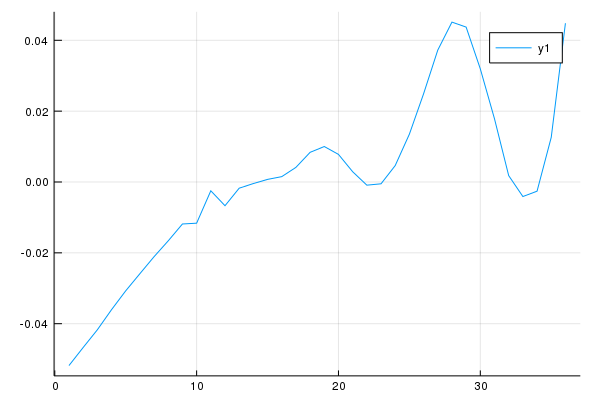

In [30]:
plot(w_labor_share[1,25,24,:])